Codebase: https://www.kaggle.com/code/emilieyip/vehicle-license-plate-detection-cnn/notebook 

This dataset contains 300 images with bounding box annotations of the car license plates within the image. Our goal here is to train a convolutional neural network capable of locating licenses plate on new images. 

## Preparation of the data

Import libraries

In [1]:
#The following two installation steps are needed to generate a PDF version of the notebook
#(These lines are needed within Google Colab, but are not needed within a local version of Jupyter notebook)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/ComputerVision_FinalProject/ml/')

In [4]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install easyocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import cv2
import os
import glob
import imutils
import pytesseract
import numpy as np
from google.colab.patches import cv2_imshow
import easyocr

dataset

In [6]:
import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

input/annotations/Cars1.xml
input/annotations/Cars0.xml
input/annotations/Cars106.xml
input/annotations/Cars101.xml
input/annotations/Cars105.xml
input/annotations/Cars102.xml
input/annotations/Cars107.xml
input/annotations/Cars103.xml
input/annotations/Cars10.xml
input/annotations/Cars100.xml
input/annotations/Cars104.xml
input/annotations/Cars250.xml
input/annotations/Cars71.xml
input/annotations/Cars143.xml
input/annotations/Cars339.xml
input/annotations/Cars199.xml
input/annotations/Cars148.xml
input/annotations/Cars47.xml
input/annotations/Cars134.xml
input/annotations/Cars409.xml
input/annotations/Cars422.xml
input/annotations/Cars168.xml
input/annotations/Cars237.xml
input/annotations/Cars37.xml
input/annotations/Cars414.xml
input/annotations/Cars342.xml
input/annotations/Cars133.xml
input/annotations/Cars411.xml
input/annotations/Cars333.xml
input/annotations/Cars77.xml
input/annotations/Cars348.xml
input/annotations/Cars417.xml
input/annotations/Cars74.xml
input/annotations/Ca

We create the variable X containing all the images of cars by resizing them to 200 * 200.



In [7]:
IMAGE_SIZE = 200

In [8]:
img_dir = "input/images" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
files.sort() #We sort the images in alphabetical order to match them to the xml files containing the annotations of the bounding boxes
X=[]
for f1 in files:
    img = cv2.imread(f1)
    img = cv2.resize(img, (IMAGE_SIZE,IMAGE_SIZE))
    X.append(np.array(img))
    print(f1)
      

input/images/Cars0.png
input/images/Cars1.png
input/images/Cars10.png
input/images/Cars100.png
input/images/Cars101.png
input/images/Cars102.png
input/images/Cars103.png
input/images/Cars104.png
input/images/Cars105.png
input/images/Cars106.png
input/images/Cars107.png
input/images/Cars108.png
input/images/Cars109.png
input/images/Cars11.png
input/images/Cars110.png
input/images/Cars111.png
input/images/Cars112.png
input/images/Cars113.png
input/images/Cars114.png
input/images/Cars115.png
input/images/Cars116.png
input/images/Cars117.png
input/images/Cars118.png
input/images/Cars119.png
input/images/Cars12.png
input/images/Cars120.png
input/images/Cars121.png
input/images/Cars122.png
input/images/Cars123.png
input/images/Cars124.png
input/images/Cars125.png
input/images/Cars126.png
input/images/Cars127.png
input/images/Cars128.png
input/images/Cars129.png
input/images/Cars13.png
input/images/Cars130.png
input/images/Cars131.png
input/images/Cars132.png
input/images/Cars133.png
input/im

In [9]:
img_dir = "dataset" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
files.sort() #We sort the images in alphabetical order to match them to the xml files containing the annotations of the bounding boxes
testcomp=[]
testdataname =[]
for f1 in files:
    img = cv2.imread(f1)
    img = cv2.resize(img, (IMAGE_SIZE,IMAGE_SIZE))
    testcomp.append(np.array(img))
    testdataname.append(os.path.basename(f1))
    print(os.path.basename(f1))

car0.png
car1.png
car10.png
car100.png
car101.png
car102.png
car103.png
car104.png
car105.png
car106.png
car107.png
car108.png
car109.png
car11.png
car110.png
car111.png
car112.png
car113.png
car115.png
car116.png
car117.png
car118.png
car119.png
car12.png
car120.png
car121.png
car122.png
car123.png
car124.png
car125.png
car126.png
car127.png
car128.png
car129.png
car13.png
car130.png
car131.png
car132.png
car133.png
car134.png
car135.png
car136.png
car137.png
car138.png
car139.png
car14.png
car140.png
car141.png
car142.png
car143.png
car144.png
car145.png
car146.png
car147.png
car148.png
car149.png
car15.png
car150.png
car151.png
car152.png
car153.png
car154.png
car155.png
car156.png
car157.png
car158.png
car159.png
car16.png
car160.png
car161.png
car162.png
car163.png
car164.png
car165.png
car166.png
car167.png
car168.png
car169.png
car17.png
car170.png
car171.png
car172.png
car173.png
car174.png
car175.png
car176.png
car177.png
car178.png
car179.png
car18.png
car180.png
car181.png
c

In [10]:
testdataname

['car0.png',
 'car1.png',
 'car10.png',
 'car100.png',
 'car101.png',
 'car102.png',
 'car103.png',
 'car104.png',
 'car105.png',
 'car106.png',
 'car107.png',
 'car108.png',
 'car109.png',
 'car11.png',
 'car110.png',
 'car111.png',
 'car112.png',
 'car113.png',
 'car115.png',
 'car116.png',
 'car117.png',
 'car118.png',
 'car119.png',
 'car12.png',
 'car120.png',
 'car121.png',
 'car122.png',
 'car123.png',
 'car124.png',
 'car125.png',
 'car126.png',
 'car127.png',
 'car128.png',
 'car129.png',
 'car13.png',
 'car130.png',
 'car131.png',
 'car132.png',
 'car133.png',
 'car134.png',
 'car135.png',
 'car136.png',
 'car137.png',
 'car138.png',
 'car139.png',
 'car14.png',
 'car140.png',
 'car141.png',
 'car142.png',
 'car143.png',
 'car144.png',
 'car145.png',
 'car146.png',
 'car147.png',
 'car148.png',
 'car149.png',
 'car15.png',
 'car150.png',
 'car151.png',
 'car152.png',
 'car153.png',
 'car154.png',
 'car155.png',
 'car156.png',
 'car157.png',
 'car158.png',
 'car159.png',
 'car

We create the variable y containing all the bounding boxe annotations (label). 
Before that, we will have to resize the annotations so that it fits the new size of the images (200*200). We create a function resizeannotation for that. 

In [11]:
from lxml import etree
def resizeannotation(f):
    tree = etree.parse(f)
    for dim in tree.xpath("size"):
        width = int(dim.xpath("width")[0].text)
        height = int(dim.xpath("height")[0].text)
    for dim in tree.xpath("object/bndbox"):
        xmin = int(dim.xpath("xmin")[0].text)/(width/IMAGE_SIZE)
        ymin = int(dim.xpath("ymin")[0].text)/(height/IMAGE_SIZE)
        xmax = int(dim.xpath("xmax")[0].text)/(width/IMAGE_SIZE)
        ymax = int(dim.xpath("ymax")[0].text)/(height/IMAGE_SIZE)
    return [int(xmax), int(ymax), int(xmin), int(ymin)]
        

In [12]:
path = 'input/annotations'
text_files = ['input/annotations/'+f for f in sorted(os.listdir(path))]
y=[]
for i in text_files:
    y.append(resizeannotation(i))
print(y)

[[167, 129, 90, 93], [131, 129, 67, 103], [151, 131, 70, 4], [107, 98, 87, 85], [120, 146, 83, 134], [184, 151, 37, 111], [101, 123, 94, 118], [97, 150, 78, 142], [103, 132, 76, 122], [139, 175, 112, 157], [132, 121, 59, 83], [125, 148, 71, 129], [139, 114, 57, 86], [136, 153, 65, 135], [164, 119, 143, 99], [159, 120, 106, 97], [136, 95, 40, 67], [153, 120, 75, 75], [197, 170, 2, 10], [160, 160, 124, 147], [133, 148, 74, 131], [43, 148, 21, 136], [131, 115, 64, 88], [108, 123, 93, 113], [138, 165, 61, 116], [125, 150, 79, 134], [178, 136, 168, 128], [127, 112, 97, 98], [118, 161, 79, 147], [160, 200, 152, 191], [177, 197, 140, 150], [146, 134, 51, 66], [191, 135, 180, 124], [153, 153, 56, 57], [106, 134, 76, 107], [121, 126, 95, 109], [83, 104, 45, 82], [198, 163, 7, 19], [200, 177, 189, 167], [125, 108, 82, 90], [66, 130, 38, 113], [159, 187, 130, 163], [122, 89, 82, 77], [102, 143, 89, 135], [127, 122, 76, 93], [115, 155, 96, 149], [137, 144, 47, 104], [194, 197, 130, 164], [153, 140

In [13]:
resizeannotation("input/annotations/Cars147.xml")

[168, 126, 90, 93]

In [14]:
y[0]

[167, 129, 90, 93]

We check X et y shape

In [15]:
np.array(X).shape

(433, 200, 200, 3)

In [16]:
np.array(y).shape

(433, 4)

Display some images of the dataset to check : 

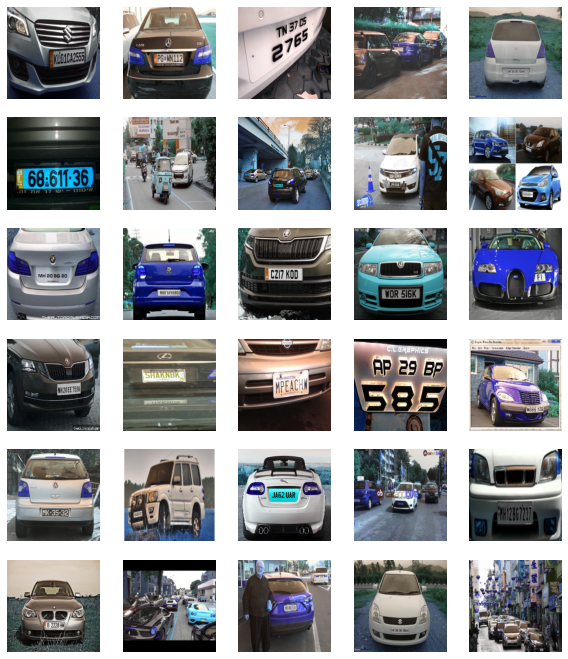

In [17]:
plt.figure(figsize=(10,20))
for i in range(0,30) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(X[i])

We can draw the rectangle containing the license plate using the OpenCV library

In [18]:
from PIL import Image

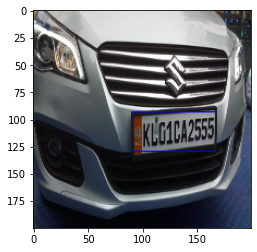

[167, 129, 90, 93]


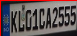

Number plate is: Py 0042555



In [19]:
#Example with the first image of the dataset
image = cv2.rectangle(X[0],(y[0][0],y[0][1]),(y[0][2],y[0][3]),(0, 0, 255))
plt.imshow(image)
plt.show()
#img[top_left_y:bot_right_y, top_left_x:bot_right_x]
tempimage = X[0]
print(y[0])
cropimage = tempimage[y[0][3]:y[0][1],y[0][2]:y[0][0]]
cv2_imshow(cropimage)
plate = pytesseract.image_to_string(cropimage, lang='eng', config='--psm 6')      # The config to show that it is single block of line
print("Number plate is:", plate)



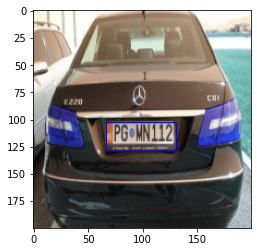

In [20]:
#Example with the second image of the dataset
image = cv2.rectangle(X[1],(y[1][0],y[1][1]),(y[1][2],y[1][3]),(0, 0, 255))
plt.imshow(image)
plt.show()


We prepare the data for the CNN :

In [21]:
#Transforming in array
X=np.array(X)
y=np.array(y)
testcomp = np.array(testcomp)

In [22]:
#Renormalisation
X = X / 255
y = y / 255
testcomp = testcomp/255

We split our dataset in two : training set/testing set

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

## CNN

In [24]:
from keras.models import Sequential

from keras.layers import Dense, Flatten

from keras.applications.vgg16 import VGG16

In [25]:
# Create the model
model = Sequential()
model.add(VGG16(weights="imagenet", include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="sigmoid"))

model.layers[-6].trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 128)               2359424   
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 17,099,140
Trainable params: 2,384,452
Non

In [26]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [27]:
train = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=120, batch_size=32, verbose=1)

Epoch 1/120
13/13 [==============================] - 11s 350ms/step - loss: 0.0269 - accuracy: 0.5116 - val_loss: 0.0110 - val_accuracy: 0.7273
Epoch 2/120
13/13 [==============================] - 2s 147ms/step - loss: 0.0097 - accuracy: 0.7558 - val_loss: 0.0071 - val_accuracy: 0.8409
Epoch 3/120
13/13 [==============================] - 2s 145ms/step - loss: 0.0055 - accuracy: 0.7995 - val_loss: 0.0056 - val_accuracy: 0.7955
Epoch 4/120
13/13 [==============================] - 2s 145ms/step - loss: 0.0031 - accuracy: 0.8226 - val_loss: 0.0071 - val_accuracy: 0.8409
Epoch 5/120
13/13 [==============================] - 2s 146ms/step - loss: 0.0029 - accuracy: 0.8303 - val_loss: 0.0053 - val_accuracy: 0.8636
Epoch 6/120
13/13 [==============================] - 2s 146ms/step - loss: 0.0021 - accuracy: 0.9126 - val_loss: 0.0046 - val_accuracy: 0.8409
Epoch 7/120
13/13 [==============================] - 2s 146ms/step - loss: 0.0018 - accuracy: 0.8843 - val_loss: 0.0038 - val_accuracy: 0.795

In [28]:
# Test
scores = model.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 90.91%


In [29]:
def plot_scores(train) :
    accuracy = train.history['accuracy']
    val_accuracy = train.history['val_accuracy']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Score apprentissage')
    plt.plot(epochs, val_accuracy, 'r', label='Score validation')
    plt.title('Scores')
    plt.legend()
    plt.show()

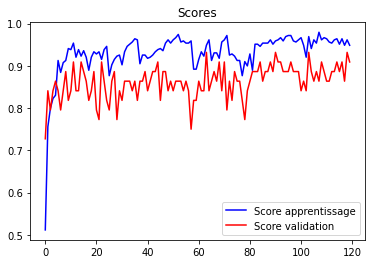

In [30]:
plot_scores(train)

## DETECTION 

In [31]:
print(testcomp.shape)
print(X_test.shape)
y_cnntest = model.predict(X_test)

(297, 200, 200, 3)
(44, 200, 200, 3)
2/2 [==============================] - 0s 130ms/step


In [32]:
y_cnntest = model.predict(X_test)
print(y_cnntest.shape)

2/2 [==============================] - 0s 122ms/step
(44, 4)


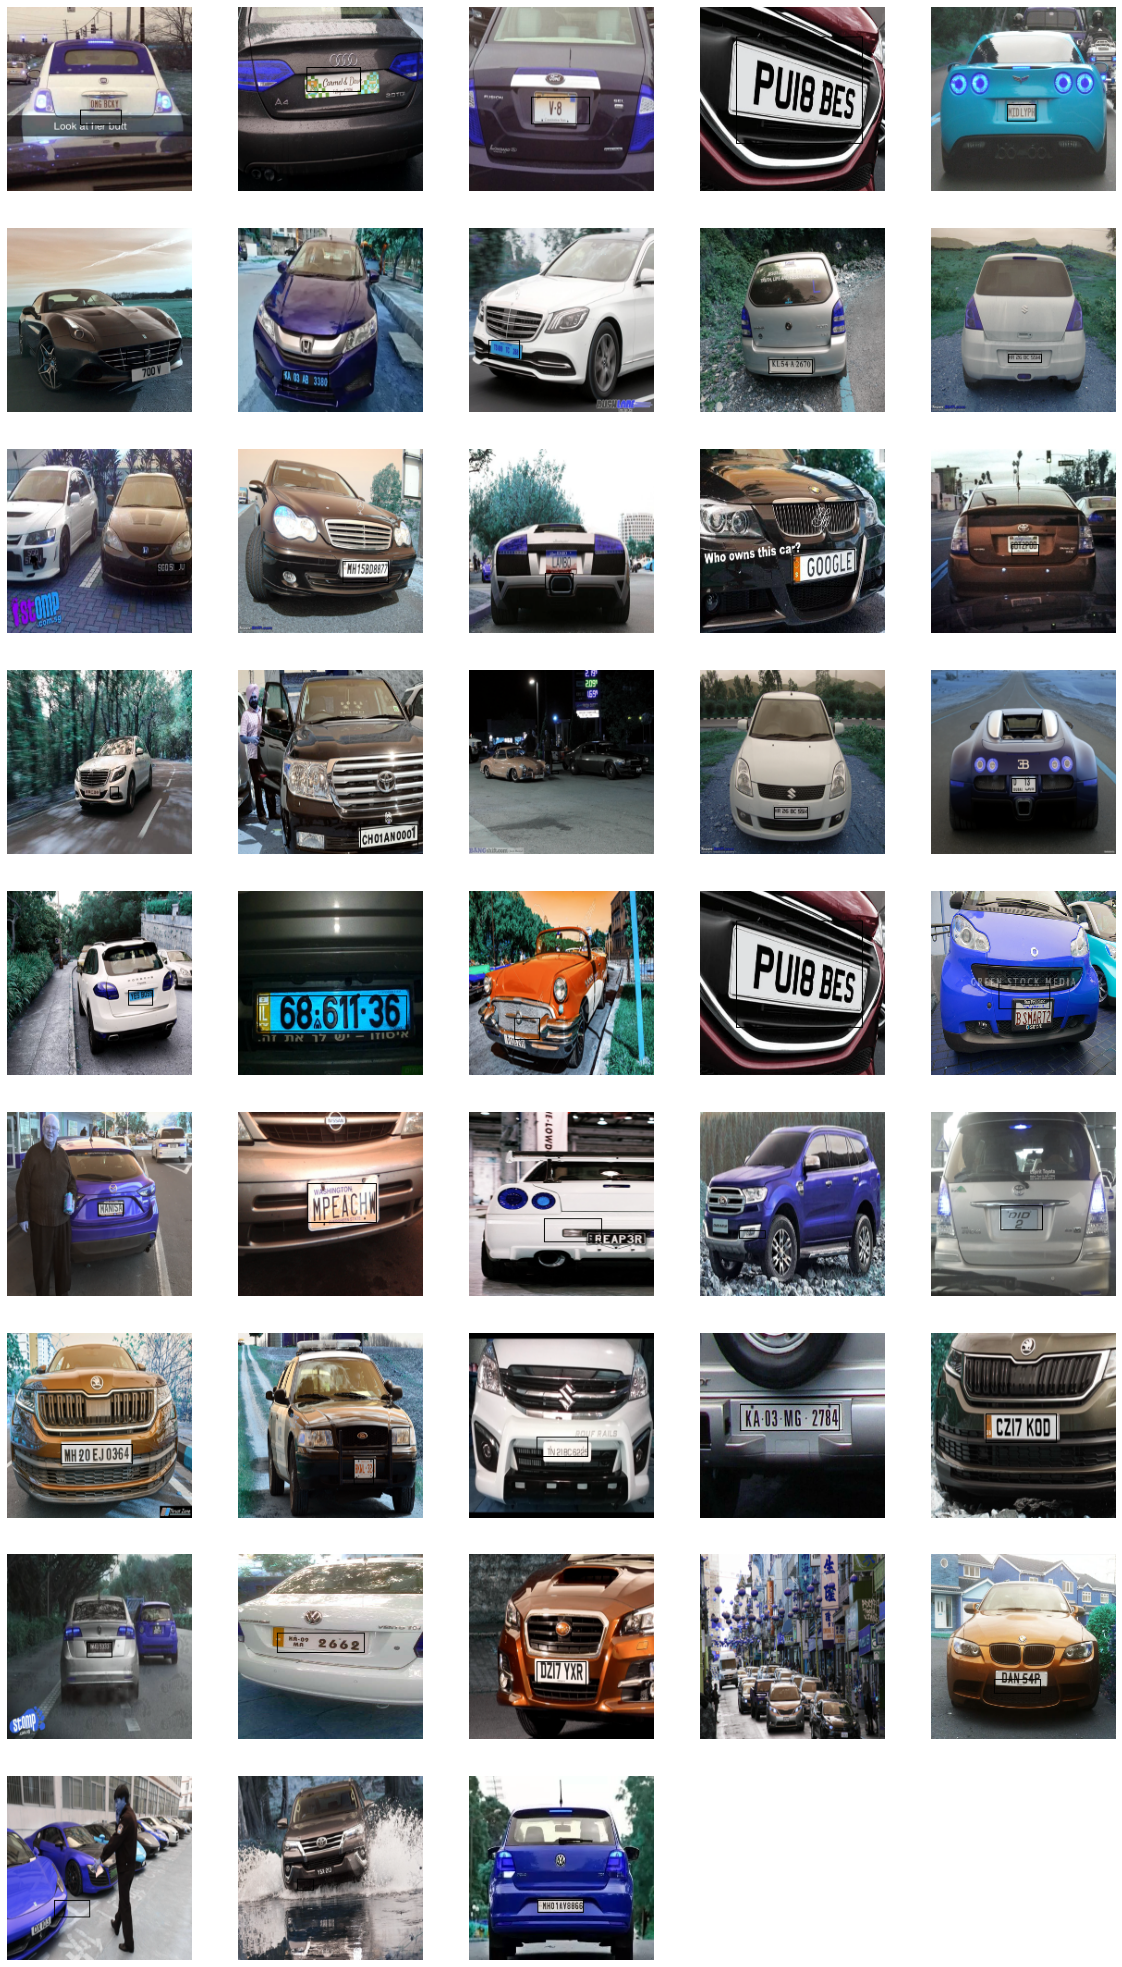

In [33]:
plt.figure(figsize=(20,40))
for i in range(0,43) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    ny = y_cnntest[i]*255
    image = cv2.rectangle(X_test[i],(int(ny[0]),int(ny[1])),(int(ny[2]),int(ny[3])),(0, 255, 0))
    plt.imshow((image * 255).astype(np.uint8))

In [34]:
y_cnn = model.predict(testcomp)

10/10 [==============================] - 2s 265ms/step


In [35]:
y_cnn.shape

(297, 4)

**Using data for compvision Final**

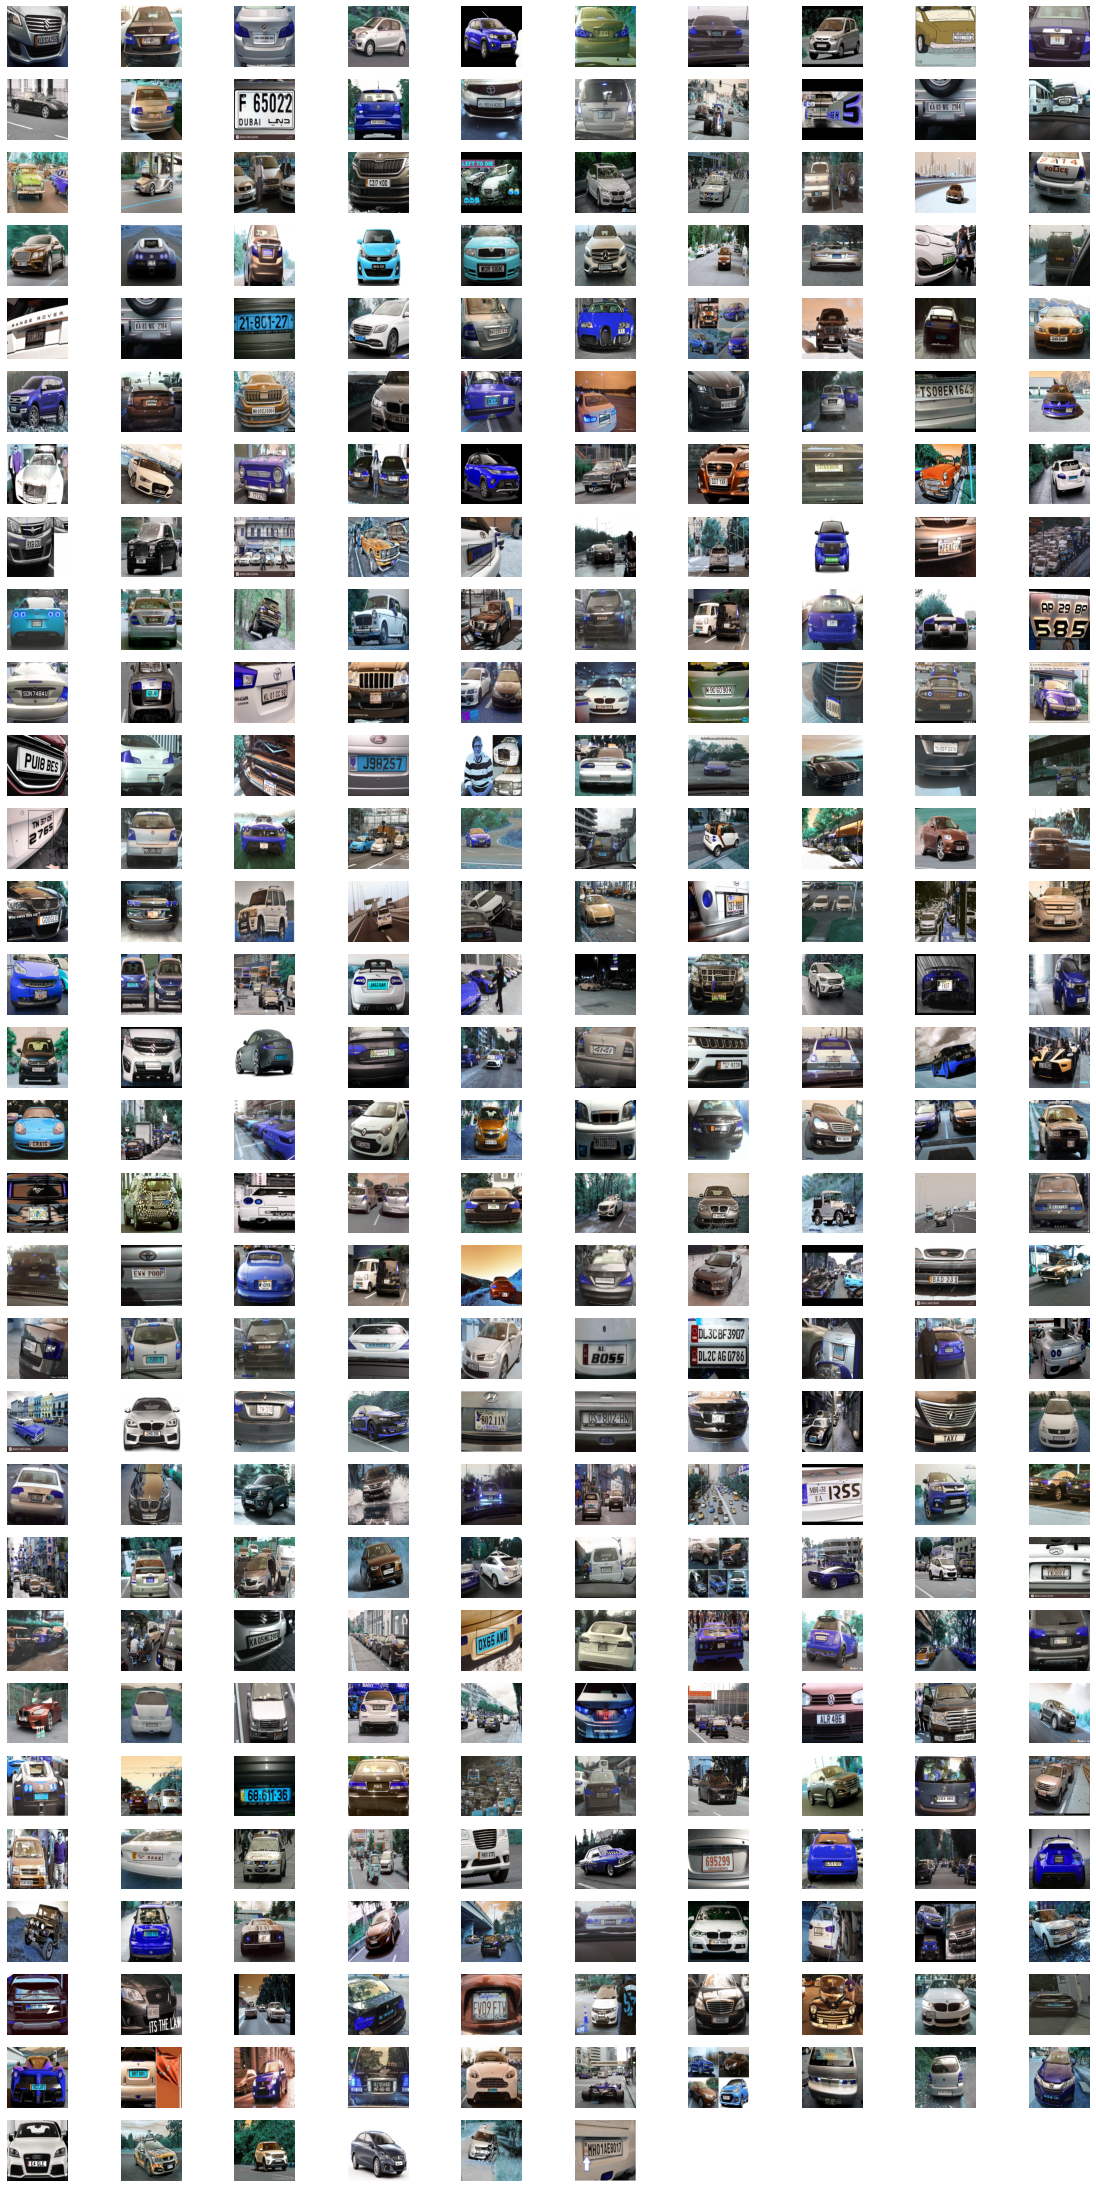

In [36]:
plt.figure(figsize=(20,40))
for i in range(0,296) :
    plt.subplot(30,10,i+1)
    plt.axis('off')
    ny = y_cnn[i]*255
    image = cv2.rectangle(testcomp[i],(int(ny[0]),int(ny[1])),(int(ny[2]),int(ny[3])),(0, 255, 0))
    plt.imshow((image * 255).astype(np.uint8))

In [37]:
for i in range(0,296) :
    ny = y_cnn[i]*255
    image = cv2.rectangle(testcomp[i],(int(ny[0]),int(ny[1])),(int(ny[2]),int(ny[3])),(0, 255, 0))

In [38]:
reader = easyocr.Reader(['en'])

**Sample **

In [39]:

testsample=[]
img = cv2.imread("dataset/car80.png")
img = cv2.resize(img, (IMAGE_SIZE,IMAGE_SIZE))
testsample.append(np.array(img))

In [40]:
testsample = np.array(testsample)

In [41]:
testsample = testsample/255

In [42]:
testsample.shape

(1, 200, 200, 3)

In [43]:
y_cnnsample = model.predict(testsample)

1/1 [==============================] - 1s 665ms/step


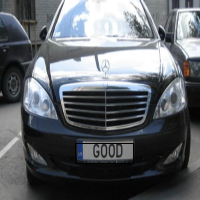

Number plate: (6ddu 
Accuracy: 0.09283467276676682


In [44]:
ny = y_cnnsample[0]*255
image = cv2.rectangle(testsample[0],(int(ny[0]),int(ny[1])),(int(ny[2]),int(ny[3])),(0, 255, 0))
tempimage = testsample[0]
ny3 = (int(ny[3]))
ny2 = (int(ny[2]))
ny1 = (int(ny[1]))
ny0 = (int(ny[0]))
cropimage = tempimage[ny3:ny1,ny2:ny0]
cropimage = (cropimage* 255).astype(np.uint8)
plate = pytesseract.image_to_string(cropimage, lang='eng', config='--psm 6')      # The config to show that it is single block of line
result = reader.readtext(cropimage)
if not result:
  print('')
else:
  result = result[0]
  cv2_imshow((image* 255).astype(np.uint8))
  cv2_imshow(cropimage)
  print("Number plate:", result[1],"\nAccuracy:", result[-1])

In [45]:
testdataname[276]
image = cv2.imread("dataset/car80.png")


In [46]:
!apt-get -qq install texlive texlive-xetex texlive-latex-extra pandoc 
!pip install --quiet pypandoc

In [47]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/ComputerVision_FinalProject/ml/')
#!jupyter nbconvert --to PDF "/content/drive/MyDrive/Colab Notebooks/ComputerVision_FinalProject/ml/compfinalCNN.ipynb"
!jupyter nbconvert --to pdf compfinalCNN.ipynb


[NbConvertApp] Converting notebook compfinalCNN.ipynb to pdf
[NbConvertApp] Support files will be in compfinalCNN_files/
[NbConvertApp] Making directory ./compfinalCNN_files
[NbConvertApp] Making directory ./compfinalCNN_files
[NbConvertApp] Making directory ./compfinalCNN_files
[NbConvertApp] Making directory ./compfinalCNN_files
[NbConvertApp] Making directory ./compfinalCNN_files
[NbConvertApp] Writing 135555 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', './notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 762193 bytes to compfinalCNN.pdf
